In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pennylane as qml
from pennylane import numpy as np

In [2]:
dev = qml.device("default.qubit", wires=1)

In [3]:
@qml.qnode(dev)
def circuit4(theta):
    qml.RX(theta, wires=0) 
    return qml.expval(qml.PauliZ(0))    

In [8]:
def cost(theta):
    return circuit4(theta)
theta = np.array(0.5, requires_grad=True)

In [9]:
opt= qml.GradientDescentOptimizer(stepsize=0.2)
steps=50
costs = []

In [10]:
for i in range(steps):
    theta, curr_cost = opt.step_and_cost(cost, theta)
    costs.append(curr_cost)
    print(f"Step {i+1}: Cost = {curr_cost:.4f}, Theta = {theta:.4f}")

Step 1: Cost = 0.8776, Theta = 0.5959
Step 2: Cost = 0.8277, Theta = 0.7081
Step 3: Cost = 0.7596, Theta = 0.8382
Step 4: Cost = 0.6688, Theta = 0.9869
Step 5: Cost = 0.5513, Theta = 1.1538
Step 6: Cost = 0.4050, Theta = 1.3366
Step 7: Cost = 0.2320, Theta = 1.5312
Step 8: Cost = 0.0396, Theta = 1.7310
Step 9: Cost = -0.1595, Theta = 1.9285
Step 10: Cost = -0.3501, Theta = 2.1158
Step 11: Cost = -0.5184, Theta = 2.2868
Step 12: Cost = -0.6564, Theta = 2.4377
Step 13: Cost = -0.7623, Theta = 2.5671
Step 14: Cost = -0.8395, Theta = 2.6758
Step 15: Cost = -0.8935, Theta = 2.7656
Step 16: Cost = -0.9302, Theta = 2.8391
Step 17: Cost = -0.9546, Theta = 2.8987
Step 18: Cost = -0.9706, Theta = 2.9468
Step 19: Cost = -0.9811, Theta = 2.9855
Step 20: Cost = -0.9878, Theta = 3.0166
Step 21: Cost = -0.9922, Theta = 3.0415
Step 22: Cost = -0.9950, Theta = 3.0615
Step 23: Cost = -0.9968, Theta = 3.0775
Step 24: Cost = -0.9979, Theta = 3.0903
Step 25: Cost = -0.9987, Theta = 3.1006
Step 26: Cost = -

In [11]:
print(f"\nOptimal theta: {theta:.4f}")


Optimal theta: 3.1414


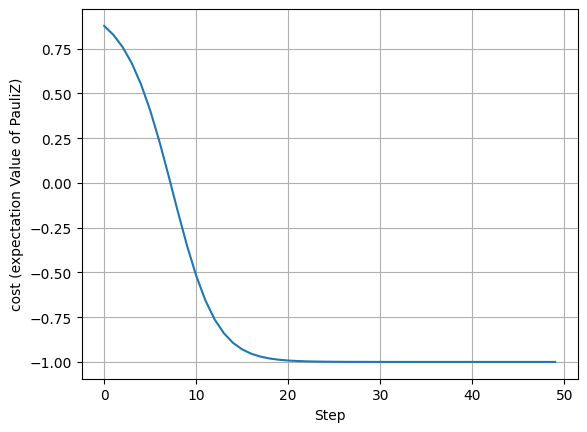

In [12]:
plt.plot(range(steps), costs)
plt.xlabel("Step")
plt.ylabel("cost (expectation Value of PauliZ)")
plt.grid(True)
plt.show()
